# Data Distribution Analysis Guide


## Overview
In this notebook, we will explore how to analyze data distributions by following a structured approach. 

The guide will cover understanding the data type, identifying the analytical question, calculating descriptive statistics, interpreting graphs and statistics.

The notebook has a toggle markdown cell `"Compare Answer"`
You can click to toggle to validate if your answer is close. It does not have to be exact. 

Recommended to use the markdown files in the repo as they have summarised steps overview with the relevant calculations.






1. Understand the Data Type: Continuous or discrete.

2. Identify the Analytical Question: Determine which distribution fits your question.

3. Calculate Descriptive Statistics: Compute and visualize summary statistics.

4. Interpret the Graph and Descriptive Statistics: Analyze the data’s distribution and patterns.



---

# Case Study-Customer Complaints:
You will be guided step-by-step:


Scenario: A retail company wants to understand the number of customer complaints received per day over the past year. 

They suspect that the number of complaints per day follows a Poisson distribution.

---

## 1. Understand the Data Type

### Step: Determine Whether Your Data is Continuous or Discrete

- **Discrete Data**: Takes on distinct, separate values. Examples include the number of emails received in an hour or the number of customer complaints. Common distributions for discrete data include:
  - **Binomial Distribution**: Used when counting the number of successes in a fixed number of trials.
  - **Poisson Distribution**: Used for modeling the number of events in a fixed interval of time or space.

- **Continuous Data**: Takes on any value within a range. Examples include height, temperature, or time. Common distributions for continuous data include:
  - **Normal Distribution**: Used for data that is symmetrically distributed around the mean.
  - **Exponential Distribution**: Used for modeling the time between events.
  - **Log-Normal Distribution**: Used for data that is normally distributed when logged.

- **Why It Matters**: The type of data determines which probability distribution and statistical methods are appropriate for analysis.



### Question: What type of data are we working with in the case study?



#### Your answer here:

Discrete Data (Poisson Distribution.)


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>The data is discrete because it represents the count of customer complaints per day.</p>
  
</details>

---


## 2. Identify the Analytical Question

### Step: Define the Problem or Question You Need to Address

- **Questions to Consider**:
  - Are you predicting an outcome?
  - Are you testing for differences?
  - Are you estimating probabilities?

- **Distribution Choice**:
  - **Binomial Distribution**: Appropriate for counting successes in a fixed number of trials (e.g., the number of heads in coin flips).
  - **Exponential Distribution**: Suitable for modeling time between events (e.g., the time between bus arrivals).
  - **Normal Distribution**: Often used for continuous data that follows a bell-shaped curve.

- **Why It Matters**: Different questions and data types require different distributions and statistical methods to accurately address the problem.



### Question: What is the main question or goal for this analysis?

#### Your Answer here:

To track the number of tickets and determine the distribution.


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>The goal is to determine whether the number of customer complaints per day follows a Poisson distribution and to visualize this distribution.</p>
  
</details>

---

## 3. Calculate Descriptive Statistics

### Step: Compute Summary Statistics to Describe the Data

- **Descriptive Statistics**:
  - **For Discrete Data**: Mean, median, mode, variance, and standard deviation.
  - **For Continuous Data**: Mean, median, variance, standard deviation, skewness, and kurtosis.

- **Visualizations**:
  - **Histograms**: To visualize the distribution of data.
  - **Bar Charts**: For discrete data counts.
  - **Box Plots**: To assess the spread and central tendency.

- **Why It Matters**: Descriptive statistics provide a summary of the data’s main features, which helps in understanding its distribution and characteristics.



### Question: What descriptive statistics should we calculate for this data?


#### Your Answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Answer: Calculate the mean and variance of the number of complaints per day. For Poisson distribution, the mean should be approximately equal to the variance.</p>
  
</details>

---

## 4. Interpret the Graph and Descriptive Statistics

### Step: Analyze the Graphical Representation and Descriptive Statistics

- **Graphs**:
  - Examine the shape, center, and spread of the data.
  - Identify patterns, outliers, and whether the data fits the expected distribution shape.

- **Descriptive Statistics**:
  - Assess the mean, median, variance, and other statistics to understand the data’s distribution and central tendencies.

- **Why It Matters**: Interpretation helps in understanding how well the data fits the assumed distribution and in identifying any anomalies or patterns.

[Scipy stats docs](https://docs.scipy.org/doc/scipy/reference/stats.html)

### Question: How can we interpret the histogram and the descriptive statistics?

In [1]:
# We will import the necessary package

import numpy as np  # this will allows us to generate random data 
import pandas as pd 
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
from scipy.stats import poisson # our stats package that contains the functions, here we import poisson specifically

In [2]:
# You need not worry about the generation of the data specifically.
# Generating synthetic data for the number of complaints
np.random.seed(0) # allows for reproducability of the results

# Using np we can specify the type of distribution and random data centered around lambda ~average of the data
data = np.random.poisson(lam=5, size=365)  # Average of 5 complaints per day

In [3]:
# Next we must calculate the descriptive stats. We will utilize np again for this, its just convenient. If the data was stored in a DF you can use
# pandas methods

mean_complaints = np.mean(data)
variance_complaints = np.var(data)

In [4]:
# check the output
print(f" the mean number of complaints are {mean_complaints}")
print(f" the variance of complaints are {variance_complaints}")


 the mean number of complaints are 5.024657534246575
 the variance of complaints are 5.492542690936386


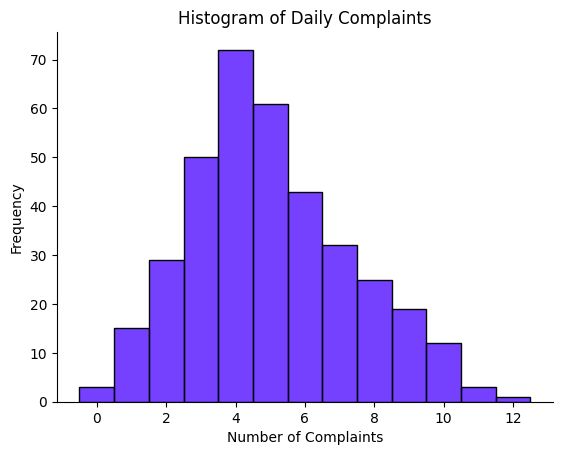

In [5]:
""" Histogram of Daily Complaints
Purpose:
The histogram provides a visual representation of the distribution of the number of customer complaints received each day over the past year.

Interpretation:

Shape of the Histogram:

The histogram should show the frequency of each count of complaints per day.
You should look for a pattern where most days have a similar number of complaints, with fewer days showing very high or very low counts.
Comparison to Poisson Distribution:

In a Poisson distribution, most of the data should cluster around the average number of complaints (λ). For this case, the average is set at 5 complaints per day.
The histogram should show a peak around this average and taper off as the number of complaints increases or decreases from this average.
"""

sns.histplot(data, discrete=True, color='#4800FF')
plt.title('Histogram of Daily Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Frequency')
sns.despine()

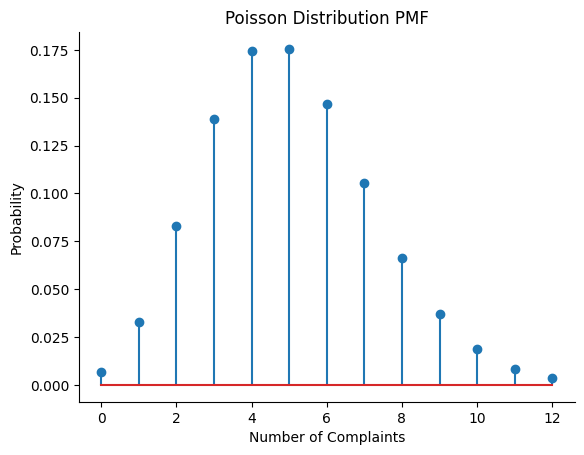

In [6]:
"""Poisson Distribution PMF Plot
Purpose:

This plot shows the Probability Mass Function (PMF) of the Poisson distribution with a mean equal to the average number of 
complaints calculated from the data.


Interpretation:

Shape of the PMF Plot:

The PMF plot displays the probability of each possible number of complaints occurring, assuming a Poisson distribution with the calculated mean.
It should show probabilities decreasing as the number of complaints increases, with the highest probability at the average number of complaints.


Comparison to Histogram:

Compare the histogram of the data with the PMF plot.
If the histogram's shape closely matches the PMF plot, it suggests that the data follows a Poisson distribution well.
If there are significant deviations, it may indicate that the data does not perfectly follow a Poisson distribution. 
For example, if the variance is much different from the mean, or if the histogram does not align with the shape of the PMF plot, 
this would suggest that the Poisson model might not be a good fit.
"""

# Poisson Distribution Plot
x = np.arange(0, max(data)+1)
pmf = poisson.pmf(x, mean_complaints)

plt.stem(x, pmf,)
plt.title('Poisson Distribution PMF')
plt.xlabel('Number of Complaints')
plt.ylabel('Probability')

sns.despine()

---


## Summary
This guide provides a structured approach to working with different types of data distributions. By following these steps, you can choose the right distribution, calculate relevant statistics, interpret data effectively, to ensure accurate analysis and conclusions.

---

# CASE STUDY- Quality Control in Manufacturing
We will now look at another scenario following a different type of distribution


Scenario: A manufacturing plant tracks the number of defective products in each batch. They want to determine if the number of defects follows a Binomial distribution, given a fixed number of products in each batch.


Hint: You can refer to the detailed overview steps from previous case study and also use the markdown file(it contains a summary of the steps and metrics to be calculated for the respective distributions). I will list the overview steps in order to not make it longer.

There is a section where you have to calculate the descriptive stats. 

1. Understand the Data Type: Continuous or discrete.

2. Identify the Analytical Question: Determine which distribution fits your question.

3. Calculate Descriptive Statistics: Compute and visualize summary statistics.

4. Interpret the Graph and Descriptive Statistics: Analyze the data’s distribution and patterns.


---

## Step 1: Understand the Data Type 



### Question: What type of data are we working with?

#### Your Answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>The data is discrete because it represents the count of defective products in each batch.</p>
  
</details>

---

## Step 2:  Identify the Analytical Question

### Question: What is the main question or goal for this analysis?

#### Your Answer here


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>The goal is to determine if the number of defects per batch follows a Binomial distribution and to visualize this distribution.
</p>
  
</details>

--- 

## Step 3:  Calculate Descriptive Statistics

### Question: What descriptive statistics should we calculate for this data?
hint:  Refer to step 3 in the markdown file for distribution_functions


#### Your answer here: 


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Calculate the mean and variance of the number of defects per batch. For a Binomial distribution,
   the mean should be:

𝑛×𝑝

and the variance should be 

𝑛×𝑝×(1−𝑝)

, where 
𝑛 is the number of trials and 
𝑝 is the probability of defect.
</p>
  
</details>

--- 

## Step 4: Interpret the Graph and Descriptive Statistics

### Question: How can we interpret the histogram and the descriptive statistics?

#### Your Answer here

<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>The histogram should show the count of defects per batch. If the data follows a Binomial distribution, the mean and variance should match the expected values from the distribution parameters.
</p>
  
</details>

In [7]:
# Generating the data, once again this is for the example you are not expected to know this.

from scipy.stats import binom # importing binom function since we are dealing with a success/failure scenario

# Generating synthetic data for defective products
np.random.seed(1)
n = 20  # Number of products per batch
p = 0.1  # Probability of a product being defective
data = np.random.binomial(n, p, size=100)

In [8]:
# calculate the descriptive stats
mean_defects = 
variance_defects = 

SyntaxError: invalid syntax (2679389208.py, line 2)

In [ ]:
# check the output
print(f" the mean number of defects are {mean_defects}")
print(f" the variance of defects are {variance_defects}")

In [ ]:
"""
Mean:
The mean of the data should be close to 
𝑛×𝑝

For this case, 
𝑛=20 and 𝑝=0.1,
so the mean should be around  2(i.e., 20×0.1).
The calculated mean of the data from the sample should be compared to this expected value.

Variance:
The variance of the data should be close to 
𝑛×𝑝×(1−𝑝)
For this case, it should be around  1.8 (i.e., 20×0.1×0.9).
The calculated variance of the data should align with this expected variance.

"""

<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p> 
 the mean number of defects are 2.02
 
 the variance of defects are 1.8796000000000002
</p>
  
</details>

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
"""
Histogram of Defective Products
Purpose:

The histogram visualizes the distribution of the number of defective products in the batches.
Interpretation:

Shape of the Histogram:

The histogram should show the frequency of batches with a certain number of defective products. 
For example, it might show that most batches have a small number of defects, with fewer batches having higher numbers.
Since the data is generated using a binomial distribution with 
n=20 and p=0.1, 
you should expect to see a distribution where most values are concentrated around the lower end of the scale, 
with fewer batches showing higher defect counts.


Distribution Characteristics:


The histogram should reflect the properties of the Binomial distribution, 
where the number of defects typically falls within a limited range (0 to 20 in this case).
The shape should show a peak near the expected number of defects, 
with the frequency tapering off as the number of defects increases or decreases significantly from the mean.

"""

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data, discrete=True, color='#ff4a11ff')
plt.title('Histogram of Defective Products')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency')

sns.despine()

In [ ]:
""" 
Binomial Distribution PMF Plot
Purpose:

This plot shows the Probability Mass Function (PMF) of the Binomial distribution with parameters 

n=20 and p=0.1.


Interpretation:

Shape of the PMF Plot:

The PMF plot displays the probability of each possible number of defects occurring in a batch.
You should see probabilities concentrated around a lower number of defects, 
consistent with a binomial distribution where the probability of defects is relatively low.
Comparison to Histogram:

Compare the histogram to the PMF plot to determine if the histogram’s shape matches the expected Binomial distribution.
If the histogram aligns well with the PMF plot, it suggests that the number of defects follows a Binomial distribution with the given parameters.
If there are significant discrepancies, such as a histogram showing a different shape or distribution than the PMF, 
this might indicate that the data does not follow a Binomial distribution as expected.

"""
# Binomial Distribution Plot
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

plt.stem(x, pmf, basefmt=" ", linefmt='--', markerfmt='o')
plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Defects')
plt.ylabel('Probability')

sns.despine()


## Summary

You should have a good overview of the steps involved when dealing with Poisson and Binomial Distribution. You have access to the markdown file which acts as a cheat sheet of sorts.

We will cover the remaining steps i.e. 5 to 7 when we explore Hypothesis testing.

Now its time to apply your new-found knowledge on a case study from scratch
